In [56]:
import os, glob
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib.patches import Patch
from adjustText import adjust_text
from matplotlib.patches import FancyArrowPatch

In [60]:
adata_fn = sorted(glob.glob('../data/processed/*/*.h5ad'))
adata_dict = {fn.split('/')[-1].split('_')[0] : fn for fn in adata_fn}
for key in adata_dict:
    adata_dict[key] = sc.read_h5ad(adata_dict[key])
    print(key, adata_dict[key])

GSE136689 AnnData object with n_obs × n_vars = 10097 × 17462
    obs: 'Stages', 'Clusters', 'Type', 'LineageAnnotations', 'celltype'
    var: 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'Stages_colors', 'celltype_colors', 'diffmap_evals', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
GSE162534 AnnData object with n_obs × n_vars = 8725 × 19013
    obs: 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'celltype'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
GSE201257 Ann

In [61]:
adata_bulk_dict = adata_dict.copy()
for key in adata_dict:
    adata_key = adata_dict[key][~adata_dict[key].obs.celltype.isna()]
    adata_bulk_dict[key] = sc.get.aggregate(adata_key, 'celltype', 'mean')
    print(key, adata_bulk_dict[key])

GSE136689 AnnData object with n_obs × n_vars = 8 × 17462
    obs: 'celltype'
    var: 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    layers: 'mean'
GSE162534 AnnData object with n_obs × n_vars = 3 × 19013
    obs: 'celltype'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    layers: 'mean'
GSE201257 AnnData object with n_obs × n_vars = 12 × 21676
    obs: 'celltype'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    layers: 'mean'
GSE229103 AnnData object with n_obs × n_vars = 7 × 20088
    obs: 'celltype'
    var: 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    layers: 'mean'


In [62]:
signature_fn = sorted(glob.glob('../03_signatures/results/*/*.txt'))
signature_dict = {'_'.join(fn.split('/')[-2:]).replace('.txt', '') : fn for fn in signature_fn}
for key in signature_dict:
    signature_dict[key] = np.loadtxt(signature_dict[key], dtype = str)
    print(key, signature_dict[key])

GSE136689_early ['Egfl7' 'Fam162a' 'Mpped2' 'Cdkn1c' 'Npm3' 'Tbx1' 'Tpm2' 'Ier2' 'Ube2c'
 'Aldoa' 'Gpx3' 'Car2' 'Cited2' 'Ebf1' 'Rbm24' 'Fgf8' 'Irx1' 'Nnat'
 'Galk1' 'Dab2' 'Slc16a3' 'Clu' 'Tpm1' 'Actb' 'Ccnd2' 'Igfbpl1' 'Higd1a'
 'Nop58' 'Isl1' 'Pdcd4' 'Cnn2' 'Map1b' 'Myl4' 'Ifitm1' 'Ddit4' 'Id1'
 'Gm266' 'Id3' 'Myl7' 'Tpi1' 'Asb4' 'Cks2' 'Tspan7' 'Vamp5' 'Prrx2' 'Gpi1'
 'Tnnt2' 'Meg3' 'Nrg1' 'Pfkl' 'Mmd' 'Sox11' 'Slc2a1' 'Hn1' 'Mpzl1' 'Tnni1'
 'Igfbp2' 'Apoe' 'Rdx' 'Wls' 'Irx3' 'Bnip3' 'Vamp8' 'Frzb' 'Xist' 'Rcsd1'
 'Irx5' 'Crabp1' 'Plk1' 'Polr2h' 'Fst' 'Traf4' 'Nkx2-5' 'Mef2c']
GSE136689_late ['Hoxb1' 'Osr1' 'Foxf1' 'Mdk' 'Rbp1' 'Rgs5' 'Mycn' 'Manf' 'Abhd11os'
 'Aldh1a2' 'H19' 'Krt18' 'Homer2' 'Csrp2' 'Pmp22' 'Peg3' 'Hoxa1' 'Popdc2'
 'Phlda1' 'Sfrp5' 'Gata6' 'Bex2' 'Cox17' 'Gyg' 'Nrp1' 'Hotairm1' 'Rras2'
 'Dusp9' 'Ly6e' 'Ngfrap1' 'Gata5' 'Fam188a' 'Wbp5' 'Bex1' 'Sfrp1' 'Wnt2'
 'Alx1' 'Smarcd3' 'Ddt' 'Nr2f2' 'Hand2' 'Car4' 'Krt8' 'Arg1' 'Meis1' 'Id2'
 'Phlda2']
GSE162534_early ['Igfb

In [64]:
df_ix = np.concatenate([adata_bulk_dict[key].obs.celltype for key in adata_bulk_dict])
df_col = np.asarray(signature_dict.keys())
df = pd.DataFrame(0., index = df_ix, columns = df_col)
for adata in adata_bulk_dict.values():
    for col in df.columns:
        df.loc[adata.obs.celltype, col] = sc.tl.score_genes(
            adata, signature_dict[col], ctrl_as_ref = True,
            score_name = col, copy = True, layer = 'mean').obs[col]
df_norm = df.apply(zscore)

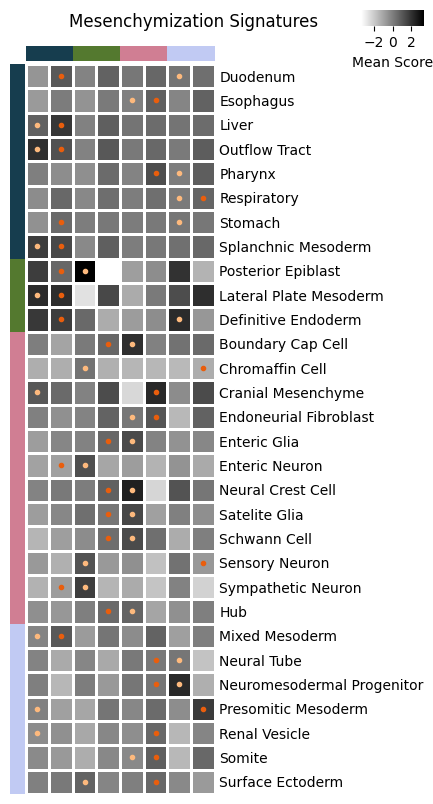

In [97]:
# signatures heatmap
col_cat = np.flip(np.vstack(df.columns.str.split('_')), 1)
col_cat = pd.DataFrame(col_cat, index = df.columns, columns = ['stage', 'GEO'])
row_cat = np.concatenate([[key] * adata_bulk_dict[key].shape[0] for key in adata_bulk_dict])
row_cat = pd.Series(row_cat, index = df.index, name = 'GEO')

stages = col_cat.stage.unique()
dsets = col_cat.GEO.unique()
stage_cdict = dict(zip(stages, sns.color_palette('Oranges', stages.size)))
dset_cdict = dict(zip(dsets, sns.color_palette('cubehelix', dsets.size)))
col_colors = col_cat.copy()
col_colors['stage'] = col_colors.stage.map(stage_cdict)
col_colors['GEO'] = col_colors.GEO.map(dset_cdict)
row_colors = row_cat.map(dset_cdict)

lw, figsize, colors_ratio, cbar_pos = 1, (5, 11), (.06, .016), (.835, .8325, .125, .015)
cbar_dict = {'label' : 'Mean Score', 'orientation' : 'horizontal'}
g = sns.clustermap(
    df_norm, row_cluster = False, col_cluster = False, figsize = figsize, cmap = 'binary',
    row_colors = row_colors, col_colors = col_colors.GEO, colors_ratio = colors_ratio,
    cbar_pos = cbar_pos, cbar_kws = cbar_dict, linewidths = lw, linecolor = 'w')

for stage in stages:
    msk_stage = (col_cat.stage == stage)
    for i, ix in enumerate(df.index):
        max_signature = df_norm.loc[ix, msk_stage].idxmax()
        xx = np.where(df.columns == max_signature)[0][0] + .5
        g.ax_heatmap.scatter(xx, (i + .5), marker = '.', color = stage_cdict[stage])

for ax in (g.ax_row_dendrogram, g.ax_col_dendrogram):
    ax.set_visible(False)

for ax in (g.ax_row_colors, g.ax_col_colors):
    for im in ax.collections: im.set_linewidth(0)
    ax.set_xticks([])
    ax.set_yticks([])

g.ax_heatmap.set_ylabel('')
g.ax_heatmap.tick_params('y', size = 0)
g.ax_heatmap.set_xticks([])
plt.suptitle('Mesenchymization Signatures', y = .845)

cbar_ticks = np.arange(-2, 3, 2, dtype = int)
g.ax_cbar.set_xticks(cbar_ticks)
plt.show()


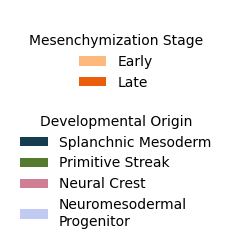

In [101]:
# heatmap legend
dset_labels = {
    'GSE201257' : 'Neural Crest',
    'GSE229103' : 'Neuromesodermal\nProgenitor',
    'GSE136689' : 'Splanchnic Mesoderm',
    'GSE162534' : 'Primitive Streak'
    }

stage_legend = [None] * stages.size
for i, key in enumerate(stage_cdict):
    stage_legend[i] = Patch(facecolor = stage_cdict[key], label = key.capitalize())

dset_legend = [None] * dsets.size
for i, key in enumerate(dset_cdict):
    dset_legend[i] = Patch(facecolor = dset_cdict[key], label = dset_labels[key])

fig, ax = plt.subplots(1, 1, figsize = (2.5, 2.5))
l1 = ax.legend(handles = stage_legend, title = 'Mesenchymization Stage', loc = 'lower center', bbox_to_anchor = (.5, .5), frameon = False)
l2 = ax.legend(handles = dset_legend, title = 'Developmental Origin', loc = 'upper center', bbox_to_anchor = (.5, .5), frameon = False)
ax.add_artist(l1)
ax.axis(False)
plt.tight_layout()
plt.show()

In [ ]:
# df_mes = df_norm.T.copy()
# df_mes['stage'] = col_cat.stage
# df_mes = df_mes.groupby('stage').max().T
# df_mes['Average'] = df_mes.mean(1)
# df_mes['Difference'] = np.diff(df_mes)
# df_mes['c'] = row_colors.values

# ms, fs, figsize, avg_thresh = 70, 8, (5, 5), 1
# fig, ax = plt.subplots(1, 1, figsize = figsize)
# msk_high = (df_mes.Average > avg_thresh)
# df_mes_high = df_mes.loc[msk_high].copy()
# df_mes_low = df_mes.loc[~msk_high].copy()
# df_mes_high.plot.scatter('Difference', 'Average', ms, 'c', lw = 0, ax = ax)
# df_mes_low.plot.scatter('Difference', 'Average', ms, 'c', lw = 0, alpha = .5, ax = ax)

# labels = [None] * df_mes_high.shape[0]
# for i, ix in enumerate(df_mes_high.index):
#     labels[i] = plt.text(*df_mes_high.loc[ix, ['Difference', 'Average']], ix, fontsize = fs, ha = 'center', va = 'center')
# adjust_text(labels, arrowprops = {'arrowstyle' : '-', 'color' : 'k', 'lw' : .5})

# xlim = np.abs(np.array(ax.get_xlim())).max()
# ax.set_xlim([-xlim, xlim])
# ax.set_xticks([])
# ax.set_xlabel('')
# ax.set_yticks([])
# ax.set_ylabel('')

# fs, label_offset, arrow_offset, text_offset, scale = 14, -.01, .133, .033, 15
# a1 = FancyArrowPatch((arrow_offset, label_offset), (1 - arrow_offset, label_offset), arrowstyle = '<|-|>',
#                      transform = fig.transFigure, mutation_scale = scale, color = 'k')
# fig.text(text_offset, label_offset, 'Early', ha = 'left', va = 'center', fontsize = fs)
# fig.text(1 - text_offset, label_offset, 'Late', ha = 'right', va = 'center', fontsize = fs)
# fig.patches.append(a1)

# a2 = FancyArrowPatch((label_offset, arrow_offset), (label_offset, 1 - arrow_offset), arrowstyle = '<|-|>',
#                      transform = fig.transFigure, mutation_scale = scale, color = 'k')
# fig.text(label_offset, text_offset, 'Low', rotation = 90, ha = 'center', va = 'bottom', fontsize = fs)
# fig.text(label_offset, 1 - text_offset, 'High', rotation = 90, ha = 'center', va = 'top', fontsize = fs)
# fig.patches.append(a2)

# ax.set_box_aspect(1)
# plt.tight_layout()
# plt.show()


ValueError: Expected a 1D array, got an array with shape (30, 2)